### 비선형 데이터 다뤄보기 SVC

In [16]:
from sklearn.svm import LinearSVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

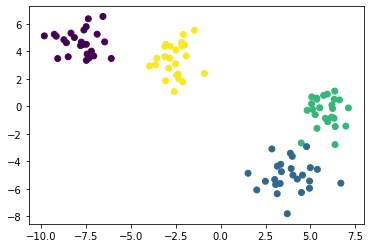

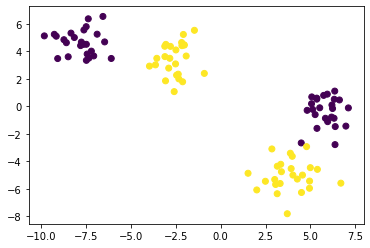

In [17]:
X,y = datasets.make_blobs(centers=4,random_state=229)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
y=y%2
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [18]:
# function 을 씌워서 공간을 왜곡시켜 분려해내기 위함
# 3 번째에 제곱된 데이터 삽입
X_new = np.hstack([X,X[:,1:]**2])

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Text(0.5, 0, 'feature1**2')

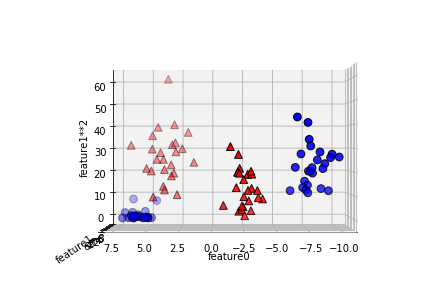

In [20]:
figure = plt.figure()
# 회전각도: y축 기준, z축 기준
ax = Axes3D(figure,elev=0,azim=90)
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',s=60,edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',marker = '^',s=60,edgecolor='k')

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

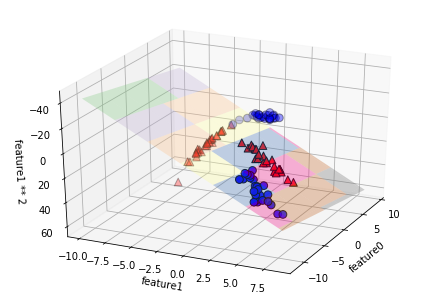

In [21]:

# 그래프 완성

linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정경계

figure = plt.figure()
ax = Axes3D(figure, elev=-152,azim=-25)

xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY+intercept)/(-coef[2])

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3, color='black',
                    cmap = cm.Accent)
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2], c='b',s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2], c='r',
           marker = '^', s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')